# 8a. ODE solutions and simulations

This lab is associated to Lectures 7b and 8a.  You are given a few differential equations to 
solve in Sympy, or simulate and plot. 

## Ex. 1

Set-up the ODE 
$$ \frac{df}{dx} = k f^2(x)$$
in Sympy.  

(a) Use Sympy to find the general solution.

(b) Find the solution to the ODE with $k=1$, satisfying the initial condition
$f(0)=1$.

(c) Find the solution to the ODE with $k=1$, satisfying the initial condition $f(0)=1/10$. 

(d) Plot your solutions to from (b) and (c) together in one plot.

In [8]:
import sympy as sp

In [9]:
f = sp.Function('f')
x = sp.Symbol('x')
k = sp.Symbol('k')

In [10]:
# Assign the differential equation
DE = sp.Eq( sp.Derivative(f(x), x), k*f(x)**2)
sp.pprint(DE)

d             2   
──(f(x)) = k⋅f (x)
dx                


In [11]:
## (a) Solve the DE for GS. ##
DE_sol = sp.dsolve(DE)
sp.pprint(DE_sol)

         -1    
f(x) = ────────
       C₁ + k⋅x


f(0) = $\frac{-1}{C_1}$  
-> $c_0$ = $\frac{-1}{f(0)} $ so $C_1$ = $\frac{-1}{f(0)}$

In [67]:
## subs k = 1 
DE_sol = DE_sol.subs(k,1)
sp.pprint(DE_sol)

        -1   
f(x) = ──────
       C₁ + x


In [68]:
f0 = 1
DE = DE_sol.subs([(sp.Symbol('C1'), -1/f0)]) 
F1 = sp.lambdify(x, DE.args[1])
sp.pprint(F1(0))

1.0


In [69]:
f0 = 1/10
DE2 = DE_sol.subs([(sp.Symbol('C1'), -1/f0)]) 
F2 = sp.lambdify(x, DE2.args[1])
sp.pprint(F2(0))

0.1


Text(0, 0.5, 'F(x)')

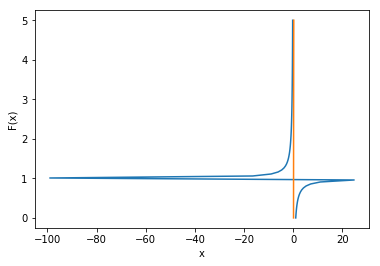

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as itg
import math

Ys = np.linspace(0,5,100)
Xs = [F1(s) for s in Ys]
Xs2 = [F2(s) for s in Ys]
plt.plot(Xs, Ys)
plt.plot(Xs2, Ys)
plt.xlabel('x')
plt.ylabel('F(x)')

## Ex. 2

Recall the single-arm pendulum ODE

$$y'' + \sin(y) = 0$$

This is turned into a first-order ODE via bookkeeping. Rather than thinking of $y(t)$ as the thing we are solving for, we solve for the
pair $(y(t), y'(t))$. 

$$\pmatrix{y \cr y'}' = \pmatrix{y' \cr -\sin(y)}$$

Now that it is a first-order ODE, use **scipy.integrate** as in class to simulate solutions to this differential equation. 
In your plots, include a quiver plot of the underlying vector field, along with several different solutions.  This differential
equation has solutions where both $y$ remains bounded, and solutions with $y$ unbounded.  Include solutions of both sorts.